#confirm data

In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_excel('智慧化燃燒器V5.xlsx')

In [ ]:
data.columns = ['Afr', 'power','caliber','up_pa','down_pa','diff_pa','temp_k','temp_c','smoke_temp','fp']

In [ ]:
corr = data.corr()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

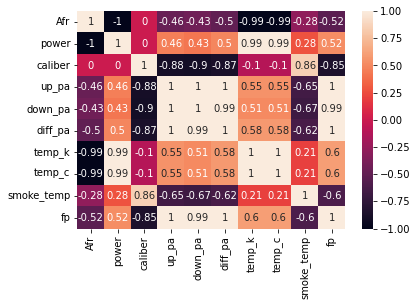

In [ ]:
sns.heatmap(corr, annot = True )
plt.show()

#select data

In [ ]:
df = data[['caliber', 'up_pa','down_pa','smoke_temp','fp']]

In [ ]:
df

,caliber,up_pa,down_pa,smoke_temp,fp
0,100.0,594.49100,278.28600,89.58,210.2000
1,103.5,510.09910,232.43857,90.37,179.3150
2,107.0,433.37125,195.54150,92.61,154.2442
3,100.0,517.29330,239.88120,89.70,177.6500
4,103.5,449.17890,206.47380,90.20,157.1700
5,107.0,379.76890,172.45253,90.95,131.2100


In [ ]:
dfvalue = df.values

In [ ]:
dfvalue[:, 1:]

array([[594.491  , 278.286  ,  89.58   , 210.2    ],
       [510.0991 , 232.43857,  90.37   , 179.315  ],
       [433.37125, 195.5415 ,  92.61   , 154.2442 ],
       [517.2933 , 239.8812 ,  89.7    , 177.65   ],
       [449.1789 , 206.4738 ,  90.2    , 157.17   ],
       [379.7689 , 172.45253,  90.95   , 131.21   ]])

#curve fitting

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
y = df.iloc[:, :1]
x = df.iloc[:, 1:]

In [ ]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(x)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y, y_pred)

0.9711623129134327

In [ ]:
model.intercept_

array([100.16863941])

In [ ]:
from  xgboost import XGBRegressor

In [ ]:
xg = XGBRegressor()

In [ ]:
xg.fit(x,y)

[06:34:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
xg.score(x,y)

0.9996272373174754